<a href="https://colab.research.google.com/github/hsantos1985/core_projects/blob/main/Notebbok_dcgan_bolos_aniversario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OBJETIVO

--O objetivo deste notebook é criar um modelo de redes generativas que consiga gerar imagens de bolos de aniversário.As imagens são em preto e branco e são desenhos

--Foram utilizadas imagens do console cloud do google.Cujo link está abaixo.

--Foi utilizada uma amostra de 90000 imagens.

--No modelo foi criada uma rede para o discriminador das imagens e o gerador de imagens falsas

--O modelo conseguiu criar imagens parecidas com bolos de aniversário, as quais são apresentadas no final deste notebook.

--Foram utilizadas 250 épocas para treinamento e um batch de 250 imagens

--O gerador conseguiu gerar nova imagens falsas, mas o discriminador estagnou na detecção de imagens falsas e verdadeiras. Isso é apresentado no gráfico de perda, no final deste notebook

--Como próximos passos faz-se ncessário aumentar a amostra de imagens, além da quantidade de épocas para treinamento, e modificação da arquitetura principalmente do discriminador, para que este possa melhorar sua performance, de detecção de novas imagens


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1-OBTENDO OS ARQUIVOS

In [ ]:
# https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap

##1-1.Escolha das imagens

Foi escolhido o conjunto de imagens de bolos de aniversário

In [ ]:
data_filepath = '/content/drive/MyDrive/datasets-dl/exercicio_iagen/full_numpy_bitmap_birthday cake.npy'

In [ ]:
#carregando os dados
import numpy as np

dados = np.load(data_filepath, encoding='latin1', allow_pickle=True)

In [ ]:
#verificando os formatos dos arquivos
dados.shape

(144982, 784)

In [ ]:
dados[1].shape

(784,)

In [ ]:
dados[10].reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 123, 226, 150,   4,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 255, 213, 255,  44,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 129, 251,  90, 255,  46,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  66, 250, 233, 255,  46,   0,   0,
          0,   0,   0,   0,   0,  21,  56,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  81, 251, 210,   9,   0,   0,
          0,   0,   0,   0,   0, 132, 235,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 150, 230,   0,   0,   0,
          0,   0,   0,   0,   0, 136, 240,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 146, 230,   0,   4,  33,
         34,  34,  34,  20,   0, 136, 240,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3, 168, 241, 181, 242, 255,
        255, 255, 255, 255, 219, 193, 213, 168, 112,  26,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  12, 156, 239, 255, 255, 207, 142,  89,
         85,  85,  85, 108, 165, 204, 204, 212, 254, 255, 254, 224, 111,
          2,   0],
       [  0,  53, 191,  94, 125, 208, 250, 149,  81,  22,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  32, 107, 122, 185, 255,
         68,   0],
       [  0,  32, 221, 255, 255, 255, 149,  81,  61,   9,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53, 255,
         69,   0],
       [  0,   0,  16, 207, 245, 249, 255, 255, 255, 246, 194, 179, 170,
        170, 157, 116,  69,  25,   0,   0,   0,   0,   0,   0,  59, 255,
         63,   0],
       [  0,   0,   0, 177, 206,   9,  34,  40,  67, 135, 184, 203, 204,
        205, 227, 254, 255, 255, 235, 189, 144, 100,  85,  85, 132, 255,
         57,   0],
       [  0,   0,   4, 239, 147,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  57, 102, 148, 192, 238, 255, 255, 255, 255, 254,
         70,   0],
       [  0,   0,  60, 255,  76,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  25,  34,  34,  65, 255,
         79,   0],
       [  0,   0, 131, 249,  12,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 255,
         84,   0],
       [  0,   0, 202, 189,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 255,
         89,   0],
       [  0,  19, 253, 118,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  27, 255,
         95,   0],
       [  0,  27, 255, 114,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,  22,  78, 195, 255,
         86,   0],
       [  0,   0, 185, 239, 118,  65,  20,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  20,  71, 123, 174, 226, 255, 255, 223,  95,
          2,   0],
       [  0,   0,  27, 189, 253, 255, 255, 232, 187, 146, 136, 136, 136,
        136, 137, 172, 223, 255, 255, 251, 209, 158, 107,  55,   4,   0,
          0,   0],
       [  0,   0,   0,   0,  17,  62, 10

In [ ]:
dados[1000].reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 105, 182,  22,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 227, 255, 200,   9,   0,
          0,   0,   0,   0,   2,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  55,  10, 167, 255, 254, 173,   2,
          0,   0,  30,  63, 158, 185,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   6,  95,  34,   7, 253, 180,  72, 255, 177, 255, 116,
          0,   0, 133, 239,  99, 255,  67,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,  77, 255, 185,   0, 240, 255,  31, 228, 209, 240, 221,
          0,   0,  91, 255,  40, 240, 143,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 108, 255, 253,  12, 120, 255, 122,  69, 188, 248,  83,
          0,   0,  41, 255,  94, 191, 212,  34,  34,  12,   0,   0,   0,
          0,   0],
       [  0,   0,  44, 195, 255,  95,  29, 254, 175,   0,  44, 254, 134,
         98,  71, 152, 253, 254, 255, 255, 255, 255, 237,  45,   0,   0,
          0,   0],
       [  0,   0,   0,  14, 248, 137,   0, 153, 241,  10,  11, 201, 255,
        254, 255, 238, 234, 211, 131, 254, 172, 103, 222, 224,   9,   0,
          0,   0],
       [  0,   0,   0,   0, 171, 230,  15,  86, 255, 235, 247, 255, 251,
        177,  69,   5,  28,  27,   0,  86,  30,   0,  55, 254, 123,   0,
          0,   0],
       [  0,   0,   0,  30, 126, 252, 243, 255, 255, 238, 136,  56,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 166, 242,  23,
          0,   0],
       [  0,   9, 208, 255, 255, 235, 181,  94,  30,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 247, 153,
          0,   0],
       [  0,  22, 199, 105,  39,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 136, 252,
         31,   0],
       [  0, 104, 252,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 255,
        108,   0],
       [  0,  33, 254, 110,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20, 255,
        103,   0],
       [  0,   0, 202, 196,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 112, 255,
         80,   0],
       [  0,   0, 115, 254,  29,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,  57, 130, 203, 253, 255, 204,
         13,   0],
       [  0,   0,  29, 254, 116,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  23,  95, 167, 237, 255, 248, 187, 115,  42,   0,
          0,   0],
       [  0,   0,   0, 186, 224,   5,   0,   0,   0,   0,   0,   0,   8,
         60, 132, 204, 254, 255, 223, 150,  78,  11,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  67, 255, 200, 170, 170, 170, 170, 184, 223, 253,
        255, 248, 186, 113,  40,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  92, 200, 204, 204, 204, 204, 196, 158, 120,
         73,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

##1-2.Convertendo os arquivos

In [ ]:
dados=dados.reshape(len(dados),28,28,1)
dados.shape

(144982, 28, 28, 1)

In [ ]:
#normalizando as imagens
dados=dados/255

In [ ]:
#retirando a amostra do total de imagens - foi retirada ua amostra de 80000 imagens
dados=dados[:90000]

#2-CRIANDO OS MODELOS DE DISCRIMINADOR E GERADOR

##2.1- Criando o discriminador
--As camadas de L1 e dropout foram inseridas no modelo, mas ele ficou satisfatório.

Desta forma, escolheu-se deixar o discriminador com todos os pesos

In [ ]:
#estabelecendo o input shape da imagem a ser inserida no discriminador
input_shape = (28, 28, 1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense
from keras import layers
from keras.regularizers import L1, L2, L1L2

discriminador = keras.Sequential(name='sequential')
discriminador.add(layers.Input(shape=input_shape))

discriminador.add(layers.Conv2D(28, kernel_size=(2, 2), activation='relu'))
discriminador.add(layers.MaxPool2D())

discriminador.add(layers.Conv2D(14, kernel_size=(2, 2), activation='relu'))
discriminador.add(layers.MaxPool2D())

discriminador.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu'))
discriminador.add(layers.MaxPool2D())

discriminador.add(layers.Flatten())
discriminador.add(layers.Dense(1, activation='sigmoid'))
discriminador.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 27, 27, 28)          │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 14)          │           1,582 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 14)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 5, 5, 32)            │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,675 (14.36 KB)

 Trainable params: 3,675 (14.36 KB)

 Non-trainable params: 0 (0.00 B)

##2.2-GERADOR

--Foram inseridas camadas de Leaky RELU

In [ ]:
from keras.layers import Reshape

In [ ]:
latent_dim = 100

In [ ]:
latent_dim = 100

gerador = keras.Sequential(name='gerador')
gerador.add(layers.Input(shape=(latent_dim, )))
gerador.add(layers.Dense(7*7*16)) # 784
gerador.add(layers.Reshape((7 , 7, 16)))
gerador.add(layers.Conv2DTranspose(14, kernel_size=(3, 3), strides=2, padding='same'))
gerador.add(layers.LeakyReLU(alpha=0.2))
gerador.add(layers.Conv2DTranspose(28, kernel_size=(3, 3), strides=2, padding='same'))
gerador.add(layers.LeakyReLU(alpha=0.2))
gerador.add(layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=1, padding='same', activation='sigmoid'))
gerador.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "gerador"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 784)                 │          79,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 14, 14, 14)          │           2,030 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 14, 14, 14)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 28, 28, 28)          │           3,556 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 28, 28, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 28, 28, 1)           │             253 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,023 (332.12 KB)

 Trainable params: 85,023 (332.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras import ops
import tensorflow as tf

#3-CRIAÇÃO DAS CLASSES E FUNÇÕES PARA O TREINO DO MODELO

In [ ]:
class DCGAN(keras.Model):
    # 3 parametros
    def __init__(self, discriminador, gerador, latent_dim):
        super().__init__()
        self.discriminador = discriminador
        self.gerador = gerador
        self.latent_dim = latent_dim

    def compile(self, d_otimizador, g_otimizador, loss_fn):
        super().compile()
        self.d_otimizador = d_otimizador
        self.g_otimizador = g_otimizador
        self.loss_fn = loss_fn

        self.d_loss_metric = keras.metrics.Mean(name='d_loss')
        self.g_loss_metric = keras.metrics.Mean(name='g_loss')

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, imagens_reais):
        batch_size = ops.shape(imagens_reais)[0]

        vetores_latentes_aleatorios = tf.random.normal(shape=(batch_size, self.latent_dim))
        imagens_falsas = self.gerador(vetores_latentes_aleatorios)
        imagens = ops.concatenate([imagens_falsas, imagens_reais], axis=0)

        label_real = ops.ones([batch_size, 1])
        label_fake = ops.zeros([batch_size, 1])
        labels = ops.concatenate([label_fake, label_real], axis=0)

        # Treinamento do Discriminador
        with tf.GradientTape() as tape:
            predicoes = self.discriminador(imagens)
            d_loss = self.loss_fn(labels, predicoes)

        grads = tape.gradient(d_loss, self.discriminador.trainable_weights)
        self.d_otimizador.apply_gradients(
            zip(grads, self.discriminador.trainable_weights)
        )

        # Trinamento do Gerador
        vetores_latentes_aleatorios = tf.random.normal(shape=(batch_size, self.latent_dim))

        labels_ruido = ops.ones([batch_size, 1])

        with tf.GradientTape() as tape:
            imagens_falsas_reais = self.gerador(vetores_latentes_aleatorios)
            predicoes_ruido = self.discriminador(imagens_falsas_reais)
            g_loss = self.loss_fn(labels_ruido, predicoes_ruido)

        grads = tape.gradient(g_loss, self.gerador.trainable_weights)
        self.g_otimizador.apply_gradients(
            zip(grads, self.gerador.trainable_weights)
        )

        # Atualizar a metrica
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {
            'd_loss': self.d_loss_metric.result(),
            'g_loss': self.g_loss_metric.result()
        }

In [ ]:
import os
import matplotlib.pyplot as plt
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=100, type_gan='gan'):
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.type_gan = type_gan

        if not os.path.exists(f'imgs_generate/{self.type_gan}'):
            os.makedirs(f'imgs_generate/{self.type_gan}')

        self.d_losses = []
        self.g_losses = []

    #def on_epoch_begin(self, epoch, logs=None):
    def on_epoch_end(self, epoch, logs=None):
        # Cria um diretório para a época atual
        # alterar {epoch:03d} para {epoch:04d} caso trabalhe com 0 até 9999 épocas.
        # alterar {epoch:03d} para {epoch:05d} caso trabalhe com 0 até 99999 épocas.
        epoch_dir = os.path.join(f'imgs_generate/{self.type_gan}', f'epoch_{epoch:03d}')
        if not os.path.exists(epoch_dir):
            os.makedirs(epoch_dir)

        # Gera imagens a partir de vetores latentes aleatórios
        random_latent_vectors = keras.random.normal(
            shape=(self.num_img, self.latent_dim), seed=42
        )
        generated_images = self.model.gerador(random_latent_vectors)
        generated_images *= 255  # Converte as imagens para a escala de 0-255
        generated_images = generated_images.numpy()  # Converte o tensor para numpy array

        for i in range(self.num_img):
            img = keras.utils.array_to_img(generated_images[i])
            img.save(os.path.join(epoch_dir, f'generated_img_{epoch:03d}_{i}.png'))


        self.d_losses.append(logs['d_loss'])
        self.g_losses.append(logs['g_loss'])

        self.plot_learning_curves()


    def plot_learning_curves(self):
        # Cria uma figura para os gráficos de perda
        plt.figure(figsize=(10, 5))
        # Plota a perda do discriminador
        plt.plot(self.d_losses, label="Discriminator Loss")
        # Plota a perda do gerador
        plt.plot(self.g_losses, label="Generator Loss")
        # Adiciona rótulo ao eixo x
        plt.xlabel("Epoch")
        # Adiciona rótulo ao eixo y
        plt.ylabel("Loss")
        # Adiciona a legenda ao gráfico
        plt.legend()
        # Adiciona um título ao gráfico
        plt.title("Learning Curves")
        # Salva o gráfico em um arquivo
        plt.savefig(f'imgs_generate/{self.type_gan}/learning_curves.jpg')
        # Fecha a figura para liberar memória
        plt.close()


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def plot_comparative_images_three_epochs(first_epoch_dir, mid_epoch_dir, last_epoch_dir, num_img=10):
    """
    Plota um comparativo das imagens geradas na primeira, intermediária e última época.

    Parameters:
    - first_epoch_dir: Diretório contendo as imagens da primeira época.
    - mid_epoch_dir: Diretório contendo as imagens da época intermediária.
    - last_epoch_dir: Diretório contendo as imagens da última época.
    - num_img: Número de imagens a serem comparadas.
    """
    # Lista de arquivos de imagens na primeira época
    first_epoch_images = sorted([os.path.join(first_epoch_dir, img) for img in os.listdir(first_epoch_dir)])[:num_img]
    # Lista de arquivos de imagens na época intermediária
    mid_epoch_images = sorted([os.path.join(mid_epoch_dir, img) for img in os.listdir(mid_epoch_dir)])[:num_img]
    # Lista de arquivos de imagens na última época
    last_epoch_images = sorted([os.path.join(last_epoch_dir, img) for img in os.listdir(last_epoch_dir)])[:num_img]

    # Cria uma figura para o comparativo
    fig, axes = plt.subplots(3, num_img, figsize=(num_img * 3, 9))
    fig.suptitle('Comparativo de Imagens: Primeira, Intermediária e Última Época')

    # Plota imagens da primeira época
    for i, img_path in enumerate(first_epoch_images):
        img = load_img(img_path)
        axes[0, i].imshow(img)
        axes[0, i].axis('off')
        axes[0, i].set_title(f"Primeira {i+1}")

    # Plota imagens da época intermediária
    for i, img_path in enumerate(mid_epoch_images):
        img = load_img(img_path)
        axes[1, i].imshow(img)
        axes[1, i].axis('off')
        axes[1, i].set_title(f"Intermediária {i+1}")

    # Plota imagens da última época
    for i, img_path in enumerate(last_epoch_images):
        img = load_img(img_path)
        axes[2, i].imshow(img)
        axes[2, i].axis('off')
        axes[2, i].set_title(f"Última {i+1}")

    plt.show()

import matplotlib.image as m_img
import matplotlib.pyplot as plt
import os

def plot_learning_curves_from_file(type_gan='dcgan', figsize=(12, 8)):
    """
    Plota as curvas de aprendizado a partir de um arquivo salvo.

    Parameters:
    - type_gan: Tipo de GAN usado para gerar as imagens e salvar o arquivo.
    - width: Largura da figura.
    - height: Altura da figura.
    """
    # Caminho para o arquivo da curva de aprendizado
    learning_curves_path = f'imgs_generate/{type_gan}/learning_curves.jpg'

    # Verifica se o arquivo existe
    if os.path.exists(learning_curves_path):
        # Carrega a imagem da curva de aprendizado
        img = m_img.imread(learning_curves_path)
        # Define o tamanho da figura
        plt.figure(figsize=figsize)
        # Exibe a imagem
        plt.imshow(img)
        plt.axis('off')  # Remove os eixos
        plt.show()
    else:
        print(f"Arquivo de curva de aprendizado não encontrado em: {learning_curves_path}")

#4-TREINO DO MODELO


--Utilização de 250 épocas e um batch de 250 imagens

In [ ]:
epochs = 250

dcgan = DCGAN(discriminador, gerador, latent_dim)

dcgan.compile(
    d_otimizador=keras.optimizers.Adam(learning_rate=0.001),
    g_otimizador=keras.optimizers.Adam(learning_rate=0.001),
    loss_fn=keras.losses.BinaryCrossentropy()
)

In [ ]:
!rm -rf imgs_generate

In [ ]:
dcgan.fit(dados, epochs=epochs, callbacks=[GANMonitor(num_img=250, latent_dim=latent_dim, type_gan='dcgan')])

Epoch 1/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - d_loss: 0.4142 - g_loss: 1.5095
Epoch 2/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - d_loss: 0.4183 - g_loss: 1.4306
Epoch 3/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - d_loss: 0.3196 - g_loss: 1.9437
Epoch 4/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - d_loss: 0.3002 - g_loss: 2.1453
Epoch 5/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - d_loss: 0.2958 - g_loss: 2.2541
Epoch 6/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - d_loss: 0.2719 - g_loss: 2.3522
Epoch 7/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - d_loss: 0.2445 - g_loss: 2.5480
Epoch 8/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - d_loss: 0.2265 - g_loss: 2.7072
Epoch 9/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - d_loss: 0.2158 - g_loss: 2.8061
Epoch 10/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - d_loss: 0.2041 - g_loss: 2.8794
Epoch 11/250
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - d_loss: 0.1820 - g_loss: 3.0856
Epoch 12/250
2813/

#5-VERIFICAÇÃO DO RESULTADO DAS IMAGENS

In [ ]:
type_gan='dcgan'

In [ ]:
first_epoch_dir = f'imgs_generate/{type_gan}/epoch_000'  # Diretório da primeira época
mid_epoch_dir = f'imgs_generate/{type_gan}/epoch_{epochs//2:03d}'  # Diretório da época intermediária
last_epoch_dir = f'imgs_generate/{type_gan}/epoch_030'  # Diretório da última época

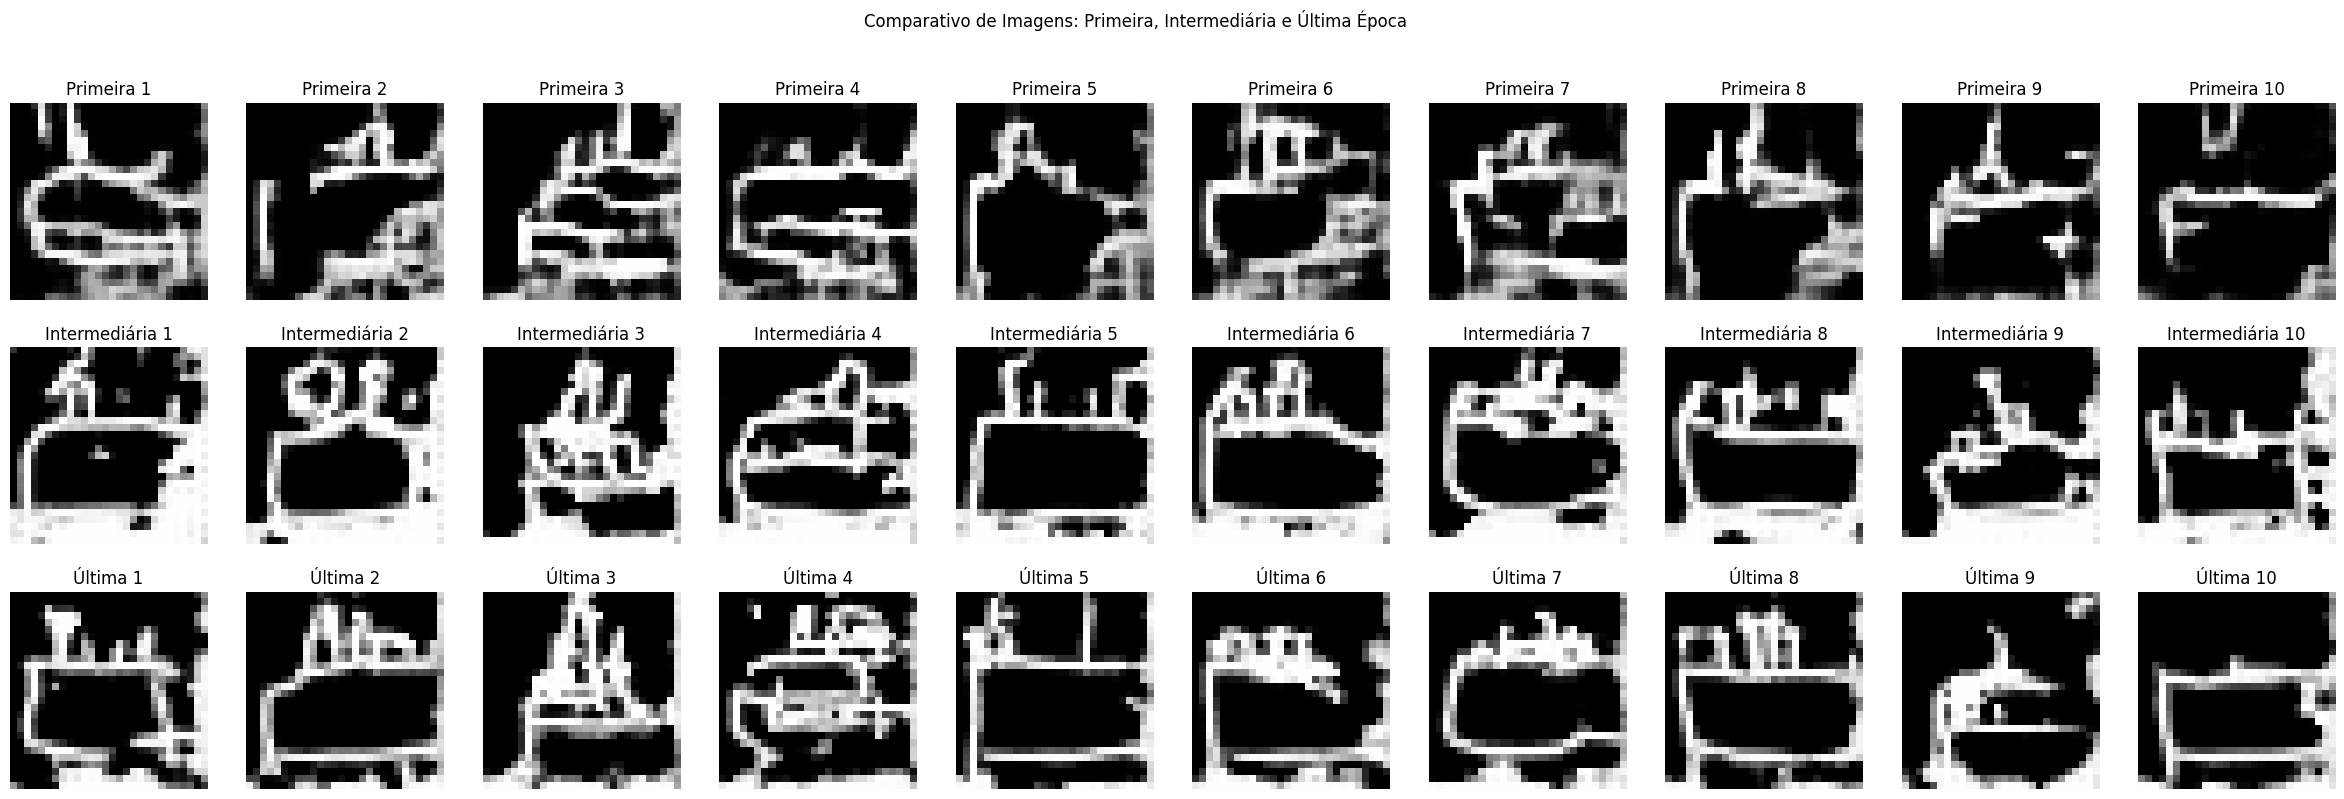

In [ ]:
plot_comparative_images_three_epochs(first_epoch_dir, mid_epoch_dir, last_epoch_dir, num_img=10)

##5.1-Verificação da curva de aprendizado do discriminador e gerador

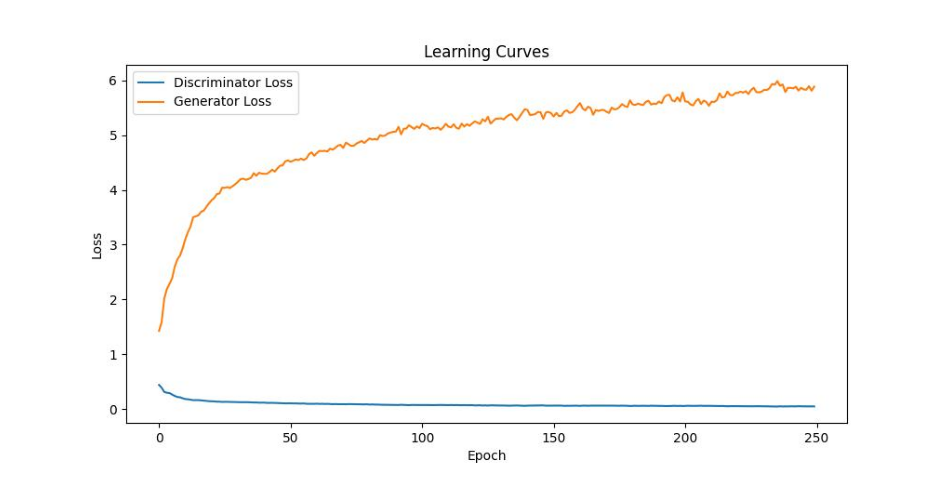

In [ ]:
plot_learning_curves_from_file(type_gan)

#6-CONCLUSÃO

In [ ]:
"""
O modelo conseguiu produzir imagens de bolos de aniversário parecidas com as imagens das amostras.
Foram utilizadas uma amostra de 90000 imagens.
Verifica-se que as últimas ficaram melhores e observa-se que o modelo conseguiu captar a parte da variabilidade de imagens de bolos de aniversário.

Como próximos passos para melhoria do modelo, poderia ser usada mais imagens da amostra.
Além disso, pode-se aumentar as épocas e fazer modificações na arquitetura do discriminador e gerador




"""

'\nO modelo conseguiu produzir imagens de bolos de aniversário parecidas com as imagens das amostras.\nForam utilizadas uma amostra de 90000 imagens.\nVerifica-se que as últimas ficaram melhores e observa-se que o modelo conseguiu captar a parte da variabilidade de imagens de bolos de aniversário.\n\nComo próximos passos para melhoria do modelo, poderia ser usada mais imagens da amostra.\nAlém disso, pode-se aumentar as épocas e fazer modificações na arquitetura do discriminador e gerador\n\n\n\n\n'